In [1]:
# machine learning using kneighbor algorithem. Use to predict quality of wine

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
estimator = KNeighborsClassifier()

In [3]:
data = pd.read_csv('winequality-red.csv', header= [0], delimiter=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [4]:
X = data.drop(['quality'], axis=1)
Y = data['quality']

In [5]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [6]:
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

0.5

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

The accuracy is 44.9%


In [8]:
avg_scores

[0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191,
 0.4490019816427191]

<IPython.core.display.Javascript object>


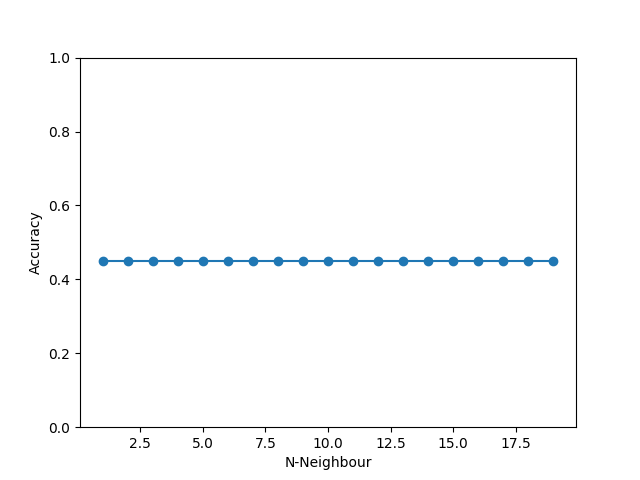

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])

plt.show()